In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/finald - finald.csv


In [2]:
import pandas as pd
data = pd.read_csv("../input/finald - finald.csv")

In [3]:
data

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
0,7.50,8.6,9.2,7.29,6.2,9.0,8.0,79.0,-16.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.50,8.6,9.2,7.29,6.2,9.0,3.0,81.0,-20.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.50,8.6,9.2,7.29,6.2,9.0,2.0,90.0,-12.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7.50,8.6,9.2,7.29,6.2,9.0,3.0,77.0,-23.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7.50,8.6,9.2,7.29,6.2,9.0,15.0,78.0,-11.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,7.99,7.3,9.1,8.27,7.8,9.0,27.0,114.0,2.0,9.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14948,7.99,7.3,9.1,8.27,7.8,9.0,17.0,103.0,-20.0,9.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14949,7.99,7.3,9.1,8.27,7.8,9.0,3.0,111.0,-26.0,9.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14950,7.99,7.3,9.1,8.27,7.8,9.0,25.0,113.0,-2.0,9.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# Removing Data Leakage
data = data.drop("D_Delay",axis = 1)

In [5]:
# Outlier Removal
data = data[data['A_Delay'] < 180]
data = data[data['A_Delay'] > -180]

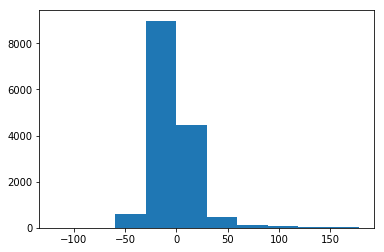

In [7]:
# Looking at the Target
plt.hist(data['A_Delay'])
plt.show()


In [9]:
# Data Description post out-lier removal
pd.options.display.max_columns = None
data.describe()

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,Duration,A_Delay,C_Rating,C_Market Share,C_Load Factor,C_On Time Performance Rating,D_DewPointC,D_WindGustKmph,D_cloudcover,D_humidity,D_precipMM,D_pressure,D_tempC,D_visibility,D_winddirDegree,D_windspeedKmph,D_Time,A_DewPointC,A_WindGustKmph,A_cloudcover,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,BLR-BOM,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
count,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000
mean,7.458336,8.039754,9.033333,7.919271,7.201660,9.060012,114.468665,-3.630418,7.527510,13.277547,86.856916,83.084443,16.972177,15.547051,29.087699,60.898353,0.105309,988.126417,25.014190,9.809121,187.530747,12.084402,6.883052,14.671581,13.750981,24.979018,45.932795,0.115750,986.097876,28.036449,9.789181,192.339985,11.066178,8.709903,0.201181,0.210887,0.107446,0.266884,0.213466,0.127130,0.239530,0.168805,0.155841,0.116948,0.191746
std,0.340949,0.817545,0.201407,0.339127,0.546549,0.051417,30.721368,20.561589,0.919875,11.894891,5.411860,8.626182,6.444734,9.360563,28.387186,20.700156,0.395379,147.831372,6.497154,2.257138,90.797693,6.627040,3.637032,7.772274,10.008730,28.722105,22.269785,0.525823,150.575592,7.876755,2.256123,98.330304,6.769901,3.721376,0.400897,0.407952,0.309690,0.442346,0.409768,0.333129,0.426811,0.374592,0.362716,0.321370,0.393688
min,7.000000,6.200000,8.700000,7.290000,6.200000,9.000000,0.000000,-119.000000,6.600000,3.600000,80.750000,70.300000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.290000,7.300000,9.000000,7.990000,7.300000,9.000000,100.000000,-15.000000,6.800000,4.000000,81.800000,74.700000,14.000000,9.000000,3.000000,48.000000,0.000000,1007.000000,22.000000,10.000000,107.000000,8.000000,5.000000,8.410000,8.000000,2.000000,28.000000,0.000000,1004.000000,24.000000,10.000000,111.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.500000,8.500000,9.100000,7.990000,7.300000,9.100000,114.000000,-6.000000,7.200000,12.000000,86.000000,87.400000,18.000000,14.000000,20.000000,65.000000,0.000000,1011.000000,25.000000,10.000000,195.000000,11.000000,6.000000,16.000000,11.000000,11.000000,45.000000,0.000000,1010.000000,28.000000,10.000000,199.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.500000,8.600000,9.200000,7.990000,7.300000,9.100000,135.000000,4.000000,7.900000,13.100000,93.300000,89.100000,22.000000,19.000000,51.000000,77.000000,0.000000,1014.000000,29.000000,10.000000,262.000000,15.000000,7.000000,22.000000,17.000000,45.000000,64.000000,0.000000,1014.000000,33.000000,10.000000,283.000000,14.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.270000,8.600000,9.200000,8.610000,8.270000,9.190000,1434.000000,178.000000,9.200000,39.700000,93.900000,91.800000,29.000000,82.000000,100.000000,94.000000,9.000000,1029.010000,45.000000,20.000000,360.000000,56.000000,23.000000,29.000000,82.00

In [11]:
# Looking at the columns..
data.columns


Index(['D_Airport Rating', 'D_Airport On Time Rating',
       'D_Airport Service Rating', 'A_Airport Rating',
       'A_Airport On Time Rating', 'A_Airport Service Rating', 'Duration',
       'A_Delay', 'C_Rating', 'C_Market Share', 'C_Load Factor',
       'C_On Time Performance Rating', 'D_DewPointC', 'D_WindGustKmph',
       'D_cloudcover', 'D_humidity', 'D_precipMM', 'D_pressure', 'D_tempC',
       'D_visibility', 'D_winddirDegree', 'D_windspeedKmph', 'D_Time',
       'A_DewPointC', 'A_WindGustKmph', 'A_cloudcover', 'A_humidity',
       'A_precipMM', 'A_pressure', 'A_tempC', 'A_visibility',
       'A_winddirDegree', 'A_windspeedKmph', 'A_Time', 'BLR-BOM', 'BLR-DEL',
       'BOM-DEL', 'CCU-DEL', 'DEL-HYD', 'Air Asia', 'Air India', 'Go Air',
       'Indigo', 'Spicejet', 'Vistara'],
      dtype='object')

In [12]:
# AVERAGE DELAYS OF AIRLINES
print(abs(data[data['Air Asia'] == 1]['A_Delay']).sum()/1873)
print(abs(data[data['Air India'] == 1]['A_Delay']).sum()/3529)
print(abs(data[data['Indigo'] == 1]['A_Delay']).sum()/2296)
print(abs(data[data['Vistara'] == 1]['A_Delay']).sum()/2825)
print(abs(data[data['Spicejet'] == 1]['A_Delay']).sum()/1723)
print(abs(data[data['Go Air'] == 1]['A_Delay']).sum()/2487)

12.59586225306994
14.678379144233494
20.692073170731707
12.523893805309735
16.52930934416715
11.02854845195014


In [13]:
# WE MAKE 4 POSSIBLE SETS OF DATA
# 1 - NO CHANGE IN FEATURES, NO CHANGE IN TARGET 
# 2 - POLYNOMIAL FEATURES OF DEGREE 2, NO CHANGE IN TARGET
# 3 - NO CHANGE IN FEATURES, TARGET NORMALIZED
# 4 - POLYNOMIAL FEATURES OF DEGREE 2, TARGET NORMALIZED

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
PT = PowerTransformer(method = "yeo-johnson")
X_train,X_test,y_train,y_test = tts(data.drop('A_Delay', axis = 1),data['A_Delay'],test_size = 0.3,random_state = 1)

PT.fit(y_train.to_numpy().reshape(-1,1))
lamb = PT.lambdas_

yt_train = PT.transform(y_train.to_numpy().reshape(-1,1))
yt_test = PT.transform(y_test.to_numpy().reshape(-1,1))

from sklearn.preprocessing import PolynomialFeatures
PF = PolynomialFeatures(2);

data_p = PF.fit_transform(data.drop('A_Delay',axis = 1))

Xp_train,Xp_test,y_train,y_test = tts(data_p,data['A_Delay'],test_size = 0.3,random_state = 1)




In [14]:
# Printing all shapes to be sure!
print(X_train.shape) # NO CHANGE APPLIED
print(X_test.shape)  # NO CHANGE APPLIED
print(y_train.shape) # NO CHANGE APPLIED
print(y_test.shape)  # NO CHANGE APPLIED
print(Xp_train.shape)# POLYNOMIAL FEATURES
print(Xp_test.shape) # POLYNOMIAL FEATURES
print(yt_train.shape)# TARGET NORMALIZED
print(yt_test.shape) # TARGET NORMALIZED


(10313, 44)
(4420, 44)
(10313,)
(4420,)
(10313, 1035)
(4420, 1035)
(10313, 1)
(4420, 1)


In [15]:
# Applying random forest regression on the data.
# Evaluation Metric used is mse.

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# NO CHANGE DATA
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train,y_train)
print(mean_squared_error(RFR.predict(X_train),y_train))
print(mean_squared_error(RFR.predict(X_test),y_test))

# TARGET NORMALIZED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train,yt_train)
print(mean_squared_error(RFR.predict(X_train),yt_train))
print(mean_squared_error(RFR.predict(X_test),yt_test))

# POLYNOMIAL FEATURES AND NO NORMALIZATION OF TARGET
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,y_train)
print(mean_squared_error(RFR.predict(Xp_train),y_train))
print(mean_squared_error(RFR.predict(Xp_test),y_test))

# BOTH POLYNOMIAL AND NORMALIZATION APPLIED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,yt_train)
print(mean_squared_error(RFR.predict(Xp_train),yt_train))
print(mean_squared_error(RFR.predict(Xp_test),yt_test))


38.41082497779524
107.73722371173395


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.07921334868217828
0.2578073033868724
30.00435866561534
101.20692011421443


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.063407798641229
0.25030577094509837


In [16]:
# SELECTING BEST 60 FEATURES BY SelecKBest

from sklearn.feature_selection import SelectKBest ,mutual_info_regression
SKB = SelectKBest(mutual_info_regression,60)

SKB.fit(Xp_train,y_train)
Xp60_train = SKB.transform(Xp_train)
Xp60_test = SKB.transform(Xp_test)

SKB.fit(Xp_train,yt_train)
Xpt60_train = SKB.transform(Xp_train)
Xpt60_test = SKB.transform(Xp_test)

print(Xp60_train.shape)
print(Xp60_test.shape)
print(Xpt60_train.shape)
print(Xpt60_test.shape)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(10313, 60)
(4420, 60)
(10313, 60)
(4420, 60)


In [17]:
print(Xp60_train.shape)
print(Xp60_test.shape)
(Xp60_train == Xpt60_train)

(10313, 60)
(4420, 60)


array([[ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       ...,
       [ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True],
       [ True, False, False, ...,  True,  True,  True]])

In [18]:
# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITHOUT NORMALIZATION
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp60_train,y_train)
print(mean_squared_error(RFR.predict(Xp60_train),y_train))
print(mean_squared_error(RFR.predict(Xp60_test),y_test))

# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITH NORMALIZATION
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xpt60_train,yt_train)
print(mean_squared_error(RFR.predict(Xpt60_train),yt_train))
print(mean_squared_error(RFR.predict(Xpt60_test),yt_test))

62.401126996435615
106.55218503188298


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.13785295367163972
0.2509969671999924


In [19]:
# TRYING SUPPORT VECTOR MACHINE ON THE DATA

from sklearn.svm import SVR
svr = SVR(kernel = 'poly',degree = 1, C = 1.0 , max_iter = 10000)

In [20]:
svr.fit(Xp60_train,yt_train)
print(mean_squared_error(svr.predict(Xp60_train),yt_train))
print(mean_squared_error(svr.predict(Xp60_test),yt_test))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1506696416672872
0.8207419788727569


In [21]:
# WE TAKE THE PREDICTED VALUES FROM THE SVR AND USE IT AS A FEATURE IN RANDOM FOREST REGRESSION

X_train_svm = np.concatenate([Xp60_train,svr.predict(Xp60_train).reshape(10313,1)],axis = 1)
X_test_svm = np.concatenate([Xp60_test,svr.predict(Xp60_test).reshape(4420,1)],axis = 1)

data_svm = np.concatenate([X_train_svm,X_test_svm],axis = 0)

In [23]:
# TRAINING RFR ON THE MODIFIED DATASET
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train_svm,yt_train)
print(mean_squared_error(RFR.predict(X_train_svm),yt_train))
print(mean_squared_error(RFR.predict(X_test_svm),yt_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.1324838045436004
0.25182373611053416


In [38]:
g1 = PT.inverse_transform(RFR.predict(X_test_svm).reshape(-1,1)).reshape(-1,)
g2 = PT.inverse_transform(yt_test.reshape(-1,1)).reshape(-1,)

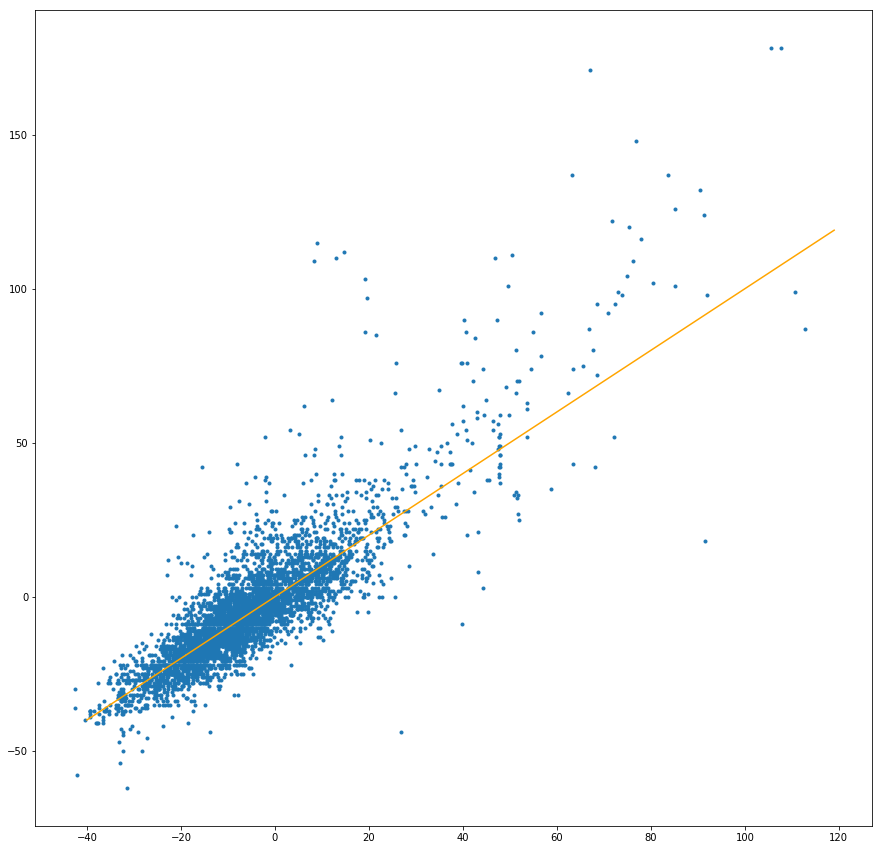

In [41]:
# LOOKING AT THE PREDICTIONS VISUALLY
# PREDICTED VS ACTUAL GRAPH
# y = x line (ORANGE)

plt.figure(figsize=(15,15))
plt.plot(np.arange(-40,120),np.arange(-40,120), color = 'orange')
plt.scatter(g1,g2, marker = '.')